In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
data = pd.read_csv('Microsoft_Stock.csv')

In [61]:
print(data.isnull().sum())

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [62]:
print(data.duplicated().sum())

0


In [63]:
print("Shape of the data:", data.shape)

Shape of the data: (1511, 6)


In [64]:
data.head(10)

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
5,4/9/2015 16:00:00,41.25,41.62,41.25,41.48,25723861
6,4/10/2015 16:00:00,41.63,41.95,41.41,41.72,28022002
7,4/13/2015 16:00:00,41.40,42.06,41.39,41.76,30276692
8,4/14/2015 16:00:00,41.80,42.03,41.39,41.65,24244382
9,4/15/2015 16:00:00,41.76,42.46,41.68,42.26,27343581


<AxesSubplot:>

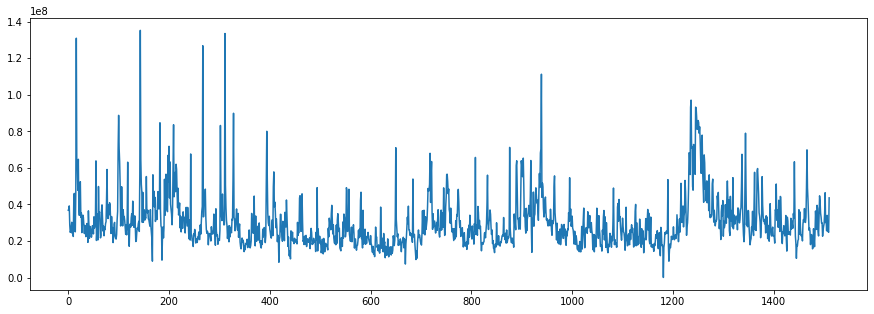

In [65]:
data['Volume'].plot(figsize=(15,5))

In [66]:
from statsmodels.tsa.stattools import adfuller

In [67]:
def adtest(dataset):
    dftest = adfuller(dataset, autolag="AIC")
    print("1. ADF : ", dftest[0])
    print("2. P-VALUES : ", dftest[1])
    print("3. NUM OF LAGS : ", dftest[2])
    print("4. NUM OF OBSERVATIONS USED FOR THE ADF REGRESSION AND CRITICAL VALUES CALCULATION : ", dftest[3])
    print("5. CRITICAL VALUES : ")
    for key, val in dftest[4].items():
        print("\t", key, ": ",val)

In [68]:
adtest(data['High'])

1. ADF :  1.5704194623040229
2. P-VALUES :  0.997766061521655
3. NUM OF LAGS :  14
4. NUM OF OBSERVATIONS USED FOR THE ADF REGRESSION AND CRITICAL VALUES CALCULATION :  1496
5. CRITICAL VALUES : 
	 1% :  -3.4347287139577753
	 5% :  -2.8634739225299133
	 10% :  -2.5677995973755325


In [69]:
from pmdarima import auto_arima

import warnings 
warnings.filterwarnings("ignore")

In [70]:
hyundai_fit = auto_arima(data['Volume'],trace=True,
                        suppress_warnings=True)
hyundai_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=53180.693, Time=1.92 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=53558.598, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=53398.605, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=53273.061, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=53556.598, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=53181.876, Time=0.86 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=53184.842, Time=0.53 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=53184.559, Time=1.32 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=53181.929, Time=1.42 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=53187.262, Time=0.37 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=53179.922, Time=1.80 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=53194.855, Time=0.50 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=53179.198, Time=2.25 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=53190.950, Time=0.57 sec
 ARIMA(2,1,4)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1511
Model:               SARIMAX(1, 1, 4)   Log Likelihood              -26582.599
Date:                Tue, 29 Nov 2022   AIC                          53179.198
Time:                        11:20:24   BIC                          53216.437
Sample:                             0   HQIC                         53193.067
                               - 1511                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3916.1095   4606.076     -0.850      0.395   -1.29e+04    5111.634
ar.L1          0.8457      0.055     15.342      0.000       0.738       0.954
ma.L1         -1.3579      0.057    -23.947      0.000      -1.469      -1.247
ma.L2          0.2676      0.045      5.887      0.000       0.178       0.357
ma.L3          0.0766      0.050      1.542      0.123      -0.021       0.174
ma.L4          0.0278      0.036      0.776      0.438      -0.043       0.098
sigma2      1.118e+14   1.05e-05   1.06e+19      0.000    1.12e+14    1.12e+14
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             24518.45
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                             2.82
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.14e+33. Standard errors may be unstable.
"""

In [71]:
from statsmodels.tsa.arima.model import ARIMA

In [101]:
print(data.shape)
train = data.iloc[:-30]
test = data.iloc[-30:]
print(train.shape, test.shape)

(1511, 6)
(1481, 6) (30, 6)


In [102]:
model = ARIMA(train['Volume'], order=(1,1,4))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Volume   No. Observations:                 1481
Model:                 ARIMA(1, 1, 4)   Log Likelihood              -26070.349
Date:                Tue, 29 Nov 2022   AIC                          52152.698
Time:                        11:23:53   BIC                          52184.497
Sample:                             0   HQIC                         52164.553
                               - 1481                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4235      0.332     -1.275      0.202      -1.075       0.228
ma.L1         -0.0824      0.332     -0.248      0.804      -0.734       0.569
ma.L2         -0.3887      0.172     -2.258      0.024      -0.726      -0.051
ma.L3         -0.1585      0.074     -2.136      0.033      -0.304      -0.013
ma.L4         -0.0985      0.039     -2.536      0.011      -0.175      -0.022
sigma2      1.129e+14   7.19e-14   1.57e+27      0.000    1.13e+14    1.13e+14
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             23757.29
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                             2.80
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.46e+41. Standard errors may be unstable.
"""

### Make predictions on test data set

In [103]:
start = len(train)
end = len(train)+len(test)-1
pred = model.predict(start=start, end = end, typ='levels')
print(pred)
pred.index = data.index[start:end+1]
print(pred)

1481    2.439660e+07
1482    2.497624e+07
1483    2.504544e+07
1484    2.549572e+07
1485    2.530505e+07
1486    2.538579e+07
1487    2.535160e+07
1488    2.536608e+07
1489    2.535995e+07
1490    2.536254e+07
1491    2.536144e+07
1492    2.536191e+07
1493    2.536171e+07
1494    2.536179e+07
1495    2.536176e+07
1496    2.536177e+07
1497    2.536177e+07
1498    2.536177e+07
1499    2.536177e+07
1500    2.536177e+07
1501    2.536177e+07
1502    2.536177e+07
1503    2.536177e+07
1504    2.536177e+07
1505    2.536177e+07
1506    2.536177e+07
1507    2.536177e+07
1508    2.536177e+07
1509    2.536177e+07
1510    2.536177e+07
Name: predicted_mean, dtype: float64
1481    2.439660e+07
1482    2.497624e+07
1483    2.504544e+07
1484    2.549572e+07
1485    2.530505e+07
1486    2.538579e+07
1487    2.535160e+07
1488    2.536608e+07
1489    2.535995e+07
1490    2.536254e+07
1491    2.536144e+07
1492    2.536191e+07
1493    2.536171e+07
1494    2.536179e+07
1495    2.536176e+07
1496    2.536177e+

<AxesSubplot:>

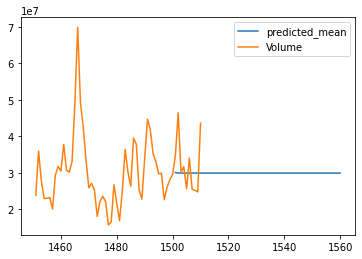

In [93]:
pred.plot(legend=True)
test['Volume'].plot(legend=True)

In [76]:
test['High'].mean()

236.67900000000003

In [77]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred, test['High']))
print(rmse)

22185650.913776767


In [78]:
data.tail()

,Date,Open,High,Low,Close,Volume
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012
1510,3/31/2021 16:00:00,232.91,239.10,232.39,235.77,43623471


### Future Prediction

In [79]:
index_future_dates = pd.date_range(start='2022-11-28', end='2022-12-28')
pred1 = pred
pred = model.predict(start=len(data), end=len(data)+30, typ = 'levels').rename('ARIMA predictions')
pred.index = index_future_dates
print(pred)

2022-11-28    2.219930e+07
2022-11-29    2.219930e+07
2022-11-30    2.219930e+07
2022-12-01    2.219930e+07
2022-12-02    2.219930e+07
2022-12-03    2.219930e+07
2022-12-04    2.219930e+07
2022-12-05    2.219930e+07
2022-12-06    2.219930e+07
2022-12-07    2.219930e+07
2022-12-08    2.219930e+07
2022-12-09    2.219930e+07
2022-12-10    2.219930e+07
2022-12-11    2.219930e+07
2022-12-12    2.219930e+07
2022-12-13    2.219930e+07
2022-12-14    2.219930e+07
2022-12-15    2.219930e+07
2022-12-16    2.219930e+07
2022-12-17    2.219930e+07
2022-12-18    2.219930e+07
2022-12-19    2.219930e+07
2022-12-20    2.219930e+07
2022-12-21    2.219930e+07
2022-12-22    2.219930e+07
2022-12-23    2.219930e+07
2022-12-24    2.219930e+07
2022-12-25    2.219930e+07
2022-12-26    2.219930e+07
2022-12-27    2.219930e+07
2022-12-28    2.219930e+07
Freq: D, Name: ARIMA predictions, dtype: float64


In [80]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [82]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.35)

In [83]:
data.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [84]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [85]:
data["Date"]=lb.fit_transform(
    ["Date"])
data.dtypes

ValueError: Length of values (1) does not match length of index (1511)

In [ ]:
data

In [ ]:
model1 = ARIMA(train['Volume'], order=(1,1,3))
model1 = model.fit()
model1.summary()
pred2 = model.predict()
